In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv("../data/dataset_attributes.csv")

In [4]:
dataset = dataset.apply(pd.to_numeric, errors='ignore')

In [5]:
y = np.empty(len(dataset['Overall']), dtype='object')

In [6]:
x = dataset.drop(['ID','ID.1','Name','Overall'], axis = 1)
y[dataset['Overall']> 85] = '0'
y[dataset['Overall']<=85] = '1'
y[dataset['Overall']<=65] = '2'

In [7]:
x = x.apply(pd.to_numeric, errors='ignore')
x = (x - x.mean()) / (x.max() - x.min())

In [8]:
x.head()

,Age,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0.220944,0.476198,0.288522,0.085449,0.314080,-0.008964,0.402258,0.408611,0.410477,0.393036,...,0.502214,0.302194,0.422351,-0.259288,0.309153,0.347805,-0.186481,0.189180,0.381794,0.515780
1,0.156428,0.455365,0.323816,-0.091022,0.326275,0.367507,0.425247,0.419600,0.317454,0.486060,...,0.487508,0.363170,0.323449,-0.224805,0.262094,0.118889,-0.220571,-0.080051,0.441318,0.481297
2,-0.004862,0.476198,0.347345,0.003096,0.399446,0.214566,0.425247,0.375644,0.294198,0.393036,...,0.384567,0.277804,0.268504,-0.144345,0.297389,0.179130,-0.266026,-0.156974,0.322270,0.458308
3,0.156428,0.434532,0.276757,0.261919,0.277495,-0.044258,0.379270,0.276743,0.317454,0.451176,...,0.458096,0.302194,0.345427,-0.086874,0.144447,0.311660,-0.027390,0.189180,0.369890,0.515780
4,0.188686,0.434532,-0.076184,-0.314551,-0.137139,-0.338376,-0.114983,0.133886,-0.403476,-0.386033,...,0.340449,-0.039269,-0.335891,-0.397219,-0.043788,-0.230508,-0.425117,0.227641,0.203223,-0.369278


In [9]:
pca = PCA(n_components=2)
lda = LDA(n_components=2)

In [10]:
X_r = pca.fit(x).transform(x)
compo = pca.components_
#compo =(compo - compo.mean()) / (compo.max() - compo.min())
#compo = compo * 10

In [11]:
X_r2 = lda.fit(x,y).transform(x)
compo2 = lda.coef_
#compo2 =(compo2 - compo2.mean()) / (compo2.max() - compo2.min())
#compo2 = compo2 * 10

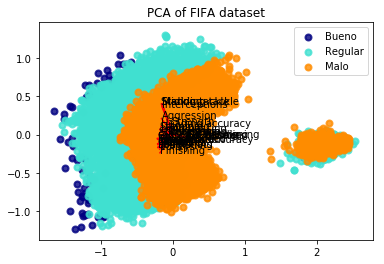

In [12]:
colors = ['navy', 'turquoise', 'darkorange']
target_names = ['Bueno','Regular','Malo']
lw = 2
plt.figure()
for color, i, target_name in zip(colors, ['0', '1', '2'], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

for a,b,component in zip(compo[0,:],compo[1,:],x.columns):
#for a,b in zip(compo[0,:],compo[1,:]):    
    plt.plot([0,a],[0,b],label=component, color='red')
    plt.text(a, b, component)

#cr7_x = X_r[0][0]
#cr7_y = X_r[0][1]
#plt.text(cr7_x,cr7_y,label="CR7", color = 'black')
    
plt.title('PCA of FIFA dataset')

plt.show()

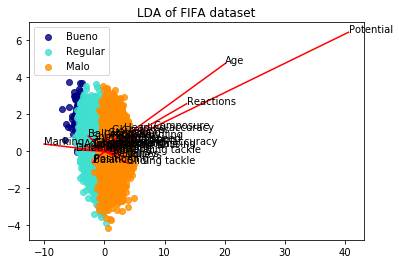

In [13]:
plt.figure()
for color, i, target_name in zip(colors, ['0', '1', '2'], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

for a,b,component in zip(compo2[0,:],compo2[1,:],x.columns):
    plt.plot([0,a],[0,b],label = component, color = 'red')
    plt.text(a, b, component)

plt.title('LDA of FIFA dataset')

plt.show()

In [14]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.54027709  0.1847154 ]


In [15]:
print('explained variance ratio (first two components): %s'
      % str(pca.components_))

explained variance ratio (first two components): [[-0.0190083  -0.04268511 -0.1417487  -0.16043861 -0.14652265 -0.11899741
  -0.21528705 -0.12949615 -0.21932644 -0.21182135 -0.21363917 -0.18257486
  -0.18361636  0.20165624  0.19244892  0.17914867  0.19317768  0.20710207
  -0.16823588 -0.15319145 -0.0430807  -0.173968   -0.21150129 -0.15118428
  -0.16449119 -0.20801745 -0.06405828 -0.19609385 -0.18928171 -0.15403782
  -0.13877982 -0.18386818 -0.16245471 -0.02559541 -0.13736416 -0.18618428]
 [ 0.03100342 -0.01341566 -0.10288538  0.21064016 -0.13318111 -0.09502123
  -0.06212008  0.00061288 -0.05089817 -0.13099923 -0.12018106 -0.23962981
  -0.09652175 -0.04214343 -0.04071896 -0.03839084 -0.03984937 -0.04340472
   0.10897845  0.36408382  0.06462445  0.04211508 -0.1662891   0.40391749
  -0.14286297 -0.17138307  0.00190037  0.00092608 -0.09576909  0.40269608
  -0.08784136  0.06494857  0.40000699  0.13538379 -0.12149375 -0.19138533]]


In [16]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.charts import Scatter
import pandas as pd
output_notebook()

Loading BokehJS ...

In [17]:
#p = Scatter(pd.DataFrame({'a':X_r[:,0],'b':X_r[:,1]}), x='a', y='b', marker="circle")

In [18]:
p = figure(title="PCA FIFA 18")

In [19]:
for color, i in zip(colors, ['0', '1', '2']):
    p.circle(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color)

In [20]:
for a,b,label in zip(compo[0,:],compo[1,:],x.columns):
    p.line([0,a],[0,b], color = 'red')
    p.text([a],[b],text=[label], text_align="center")

In [21]:
show(p)

In [22]:
p = figure(title="LDA FIFA 18")

In [23]:
for color, i in zip(colors, ['0', '1', '2']):
    p.circle(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color)

In [24]:
for a,b,label in zip(compo2[0,:],compo2[1,:],x.columns):
    p.line([0,a],[0,b], color = 'red')
    p.text([a],[b],text=[label], text_align="center")

In [25]:
show(p)